In [35]:
%%time
##-----Floquet theory:
import matplotlib.pyplot as plt
import scipy.linalg as la
import numpy as np
from tqdm import tqdm
from funcs import *


'''
    In this code, we are evolving the system upto 2T period
    for 
    
'''


N = 8
N1= int(N/2)
N2= N-N1
omega = 20.0
w = omega
T = 2 * np.pi/w

ea, eb = 0.03, 0.9
g = np.pi/T
Jvalue = 0.2/T 
beta = 1.5

lamb = 0.0
lambd_y = lamb
lambd_x = lamb

figname = 'mz_long_nonfr_weakJ.jpeg'
ft = 10    # fintsize
nprocs = N
p = Pool(processes = nprocs) 
opts = Options(nsteps=1e7)

h0 = 0.0

hsteps = 400
hs = np.linspace(0,10.0,hsteps)* w/4
        
fl_data = np.zeros((len(hs),2**(N)))
params = [{'h0':0, 'h':h, 'omega':omega, 'N':N,'N1':N1,\
           'opts':opts, 'Jvalue':Jvalue,'beta':beta,'lambd_x':lambd_x, 'lambd_y':lambd_y,\
           'g':g,'ea':ea,'eb':eb} for h in hs]

data = p.map(run_floquet,tqdm(params, position=0, leave=True))

import h5py
fname = "q_energies_4hwlong_N"+str(N)+".hdf5"
with h5py.File(fname, 'w') as hf:
    qen = hf.create_dataset("qen", np.shape(data), data=data)
    hs =  hf.create_dataset("hs",np.shape(hs),  data=np.array(hs))
    hf.attrs['frq'] = w
    hf.attrs['N'] = N 
    hf.attrs['hs'] = hs

Function definition complete!!


100%|█████████████████████████████████████████████████████████████████████████████████| 400/400 [09:18<00:00,  1.40s/it]


CPU times: user 651 ms, sys: 187 ms, total: 837 ms
Wall time: 50min 12s


Data reading done!


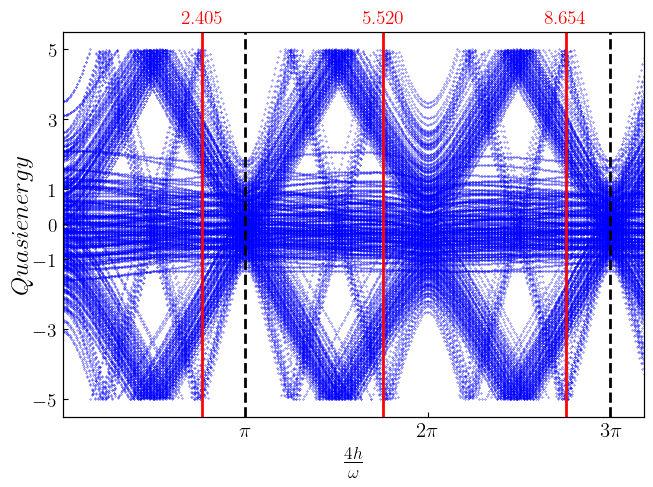

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from scipy.special import jn_zeros

plt.rcParams.update({"figure.figsize": (7.5, 5),"text.usetex": True,"font.family": "sans-serif",
    "font.size": 14,"font.sans-serif": ["Helvetica"]})

N = 8
#fname = "q_energies_4hw_N"+str(N)+".hdf5"
fname = "q_energies_4hwlong_N"+str(N)+".hdf5"
with h5py.File(fname, "r") as f:
    data = f['qen'][()]
    hs = f['hs'][()]
    w = f.attrs['frq']
    N = f.attrs['N']
    hs = f.attrs['hs']
    
print("Data reading done!")
    
fig, ax1 = plt.subplots()
    
for ii,h in enumerate(hs):
    ax1.scatter(np.ones(2**N)*(4*h/w), data[ii],   s= 0.3, marker='.', color='blue', alpha = 0.99)

for i in np.arange(3):
    ax1.axvline((2*i+1) * np.pi,  linewidth= 2.0, linestyle='--', alpha=0.99, color='black')    

ax1.set_xticks(np.pi*np.arange(1,4),[r"$\pi$", r"$2\pi$", r"$3\pi$"], rotation='horizontal', color = 'black', fontsize = 15)
ax1.set_yticks([-5,-3,-1,0,1,3,5])
ax1.set_xlim(0,4*hs[-1]/w)

ax1.tick_params(which='both', axis="x", direction="in")
ax1.tick_params(which='both', axis="y", direction="in")
ax1.set_xlabel(r"$\frac{4h}{\omega}$", fontsize = 18)
ax1.set_ylabel(r"$Quasienergy$", fontsize = 18, labelpad= 0.1)


ax11 = ax1.twiny()
ax11.set_xticks([jn_zeros(0,3)[i] for i in range(3)], [r"$%1.3f$"%jn_zeros(0,3)[i] for i in range(3)], color = 'red')  
for i in np.arange(3):
    ax11.axvline(jn_zeros(0,5)[i], linewidth= 2.0, linestyle='solid', alpha=0.99, color='red')
ax11.set_xlim(0,4*hs[-1]/w)
ax11.tick_params(which='both', axis="x", direction="in")
ax11.tick_params(which='both', axis="y", direction="in")


figname = 'quasienergy_8_lores.jpeg'
figname1 = 'quasienergy_'+ str(N) + '.pdf'
plt.savefig(figname, bbox_inches='tight', pad_inches=0.0,dpi=150)
plt.savefig(figname1, bbox_inches='tight', pad_inches=0.0)

plt.show()